In [31]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import pmdarima as pm

In [32]:
# https://www.influxdata.com/time-series-forecasting-methods/#:~:text=Time%20series%20forecasting%20means%20to,on%20what%20has%20already%20happened.
# https://www.relataly.com/forecasting-beer-sales-with-arima-in-python/2884/

In [33]:
dirc = os.getcwd()
df_train = pd.read_csv(os.path.join(dirc,'train.csv'))

In [34]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [35]:
df_train['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [36]:
df_train.groupby(['store_nbr','family']).count()

id  date  sales  onpromotion
store_nbr family                                                    
1         AUTOMOTIVE                  1684  1684   1684         1684
          BABY CARE                   1684  1684   1684         1684
          BEAUTY                      1684  1684   1684         1684
          BEVERAGES                   1684  1684   1684         1684
          BOOKS                       1684  1684   1684         1684
...                                    ...   ...    ...          ...
54        POULTRY                     1684  1684   1684         1684
          PREPARED FOODS              1684  1684   1684         1684
          PRODUCE                     1684  1684   1684         1684
          SCHOOL AND OFFICE SUPPLIES  1684  1684   1684         1684
          SEAFOOD                     1684  1684   1684         1684

[1782 rows x 4 columns]

In [37]:
df_train["date"] = pd.to_datetime(df_train["date"])

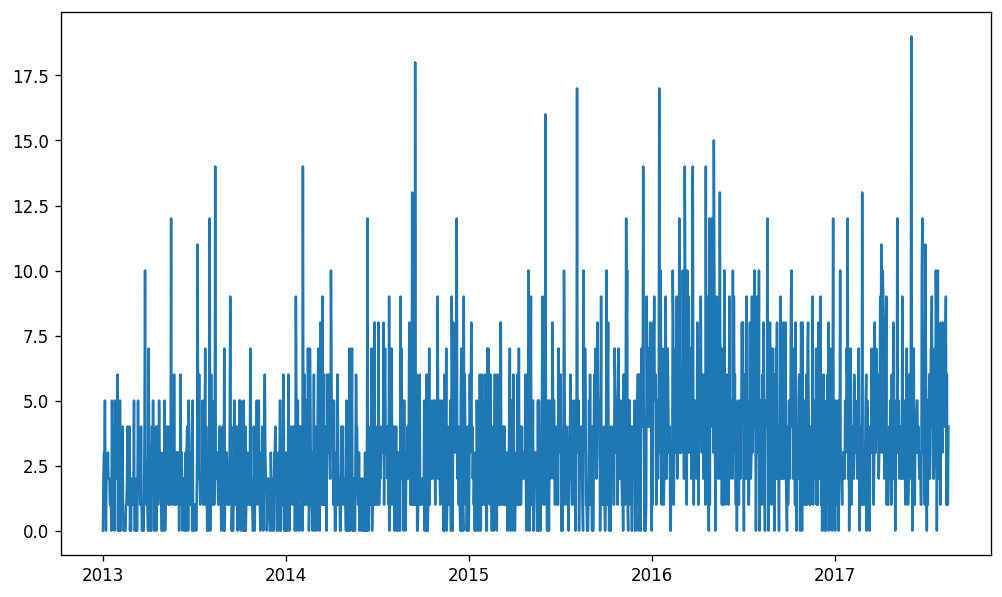

In [38]:
df1 = df_train[(df_train.store_nbr==1) & (df_train.family == 'AUTOMOTIVE')]
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1.date,df1.sales)

In [39]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month

/var/folders/b3/q8q60h0x00q1v1qv79_7sd7m0000gn/T/ipykernel_90969/984849103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = pd.DatetimeIndex(df1['date']).year
/var/folders/b3/q8q60h0x00q1v1qv79_7sd7m0000gn/T/ipykernel_90969/984849103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = pd.DatetimeIndex(df1['date']).month


In [40]:
df1.groupby('year')['date'].count()

year
2013    364
2014    364
2015    364
2016    365
2017    227
Name: date, dtype: int64

In [49]:
df2 = df1.groupby(['year','month'],as_index=False)['sales'].mean()
df2['date'] = df2.year.apply(str)+'-'+df2.month.apply(str)+'-1'
#df2['date'] = datetime.strptime(df2['date'].to_string(),'%Y-%m-%d')

In [51]:
df2['date'] = pd.to_datetime(df2["date"])

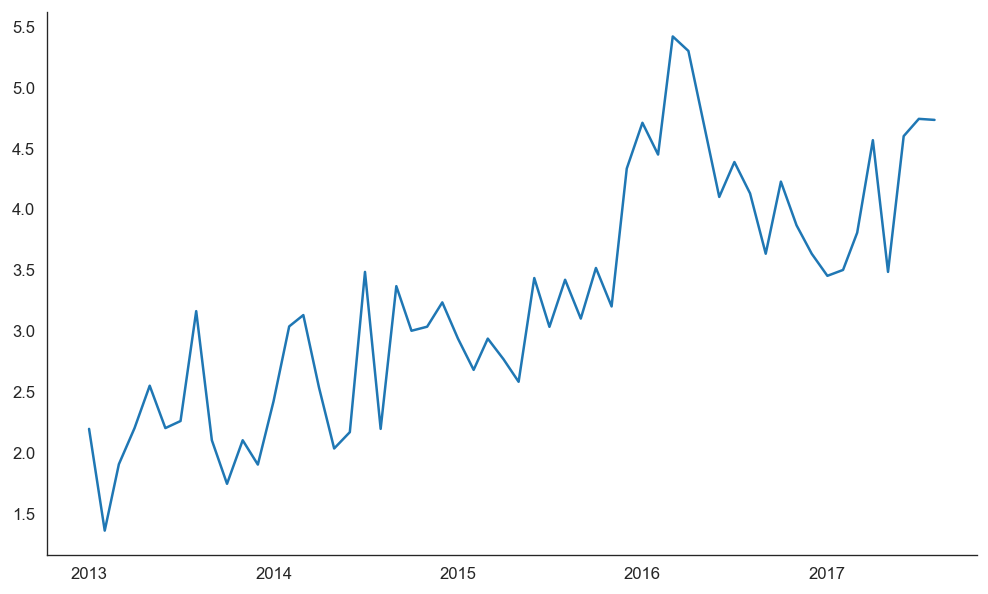

In [54]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df2.date,df2.sales)

In [55]:
# use graph to show the seasonality of time series
sns.set_style('white',{'axes.spines.right': False, 'axes.spines.top': False})

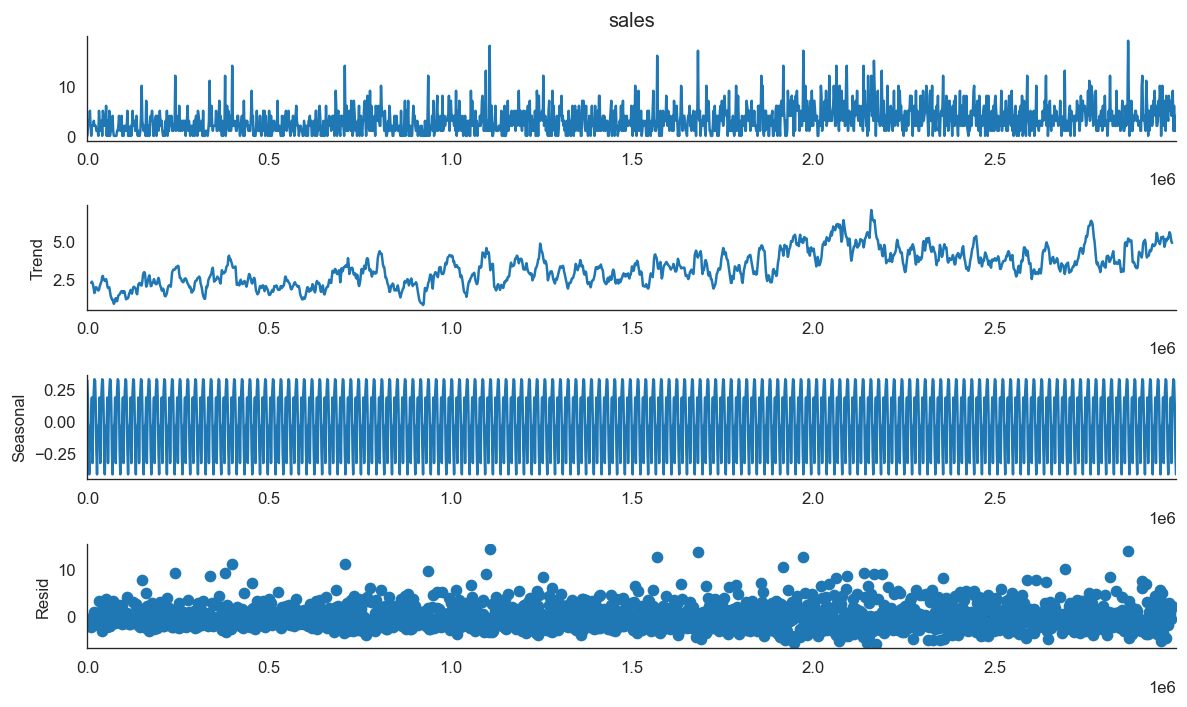

In [56]:
plt.rcParams["figure.figsize"]=(10,6)
result = seasonal_decompose(df1.sales,model='additive',period = 12)
result.plot()
plt.show()

In [57]:
df2.head()

,year,month,sales,date
0,2013,1,2.193548,2013-01-01
1,2013,2,1.357143,2013-02-01
2,2013,3,1.903226,2013-03-01
3,2013,4,2.200000,2013-04-01
4,2013,5,2.548387,2013-05-01


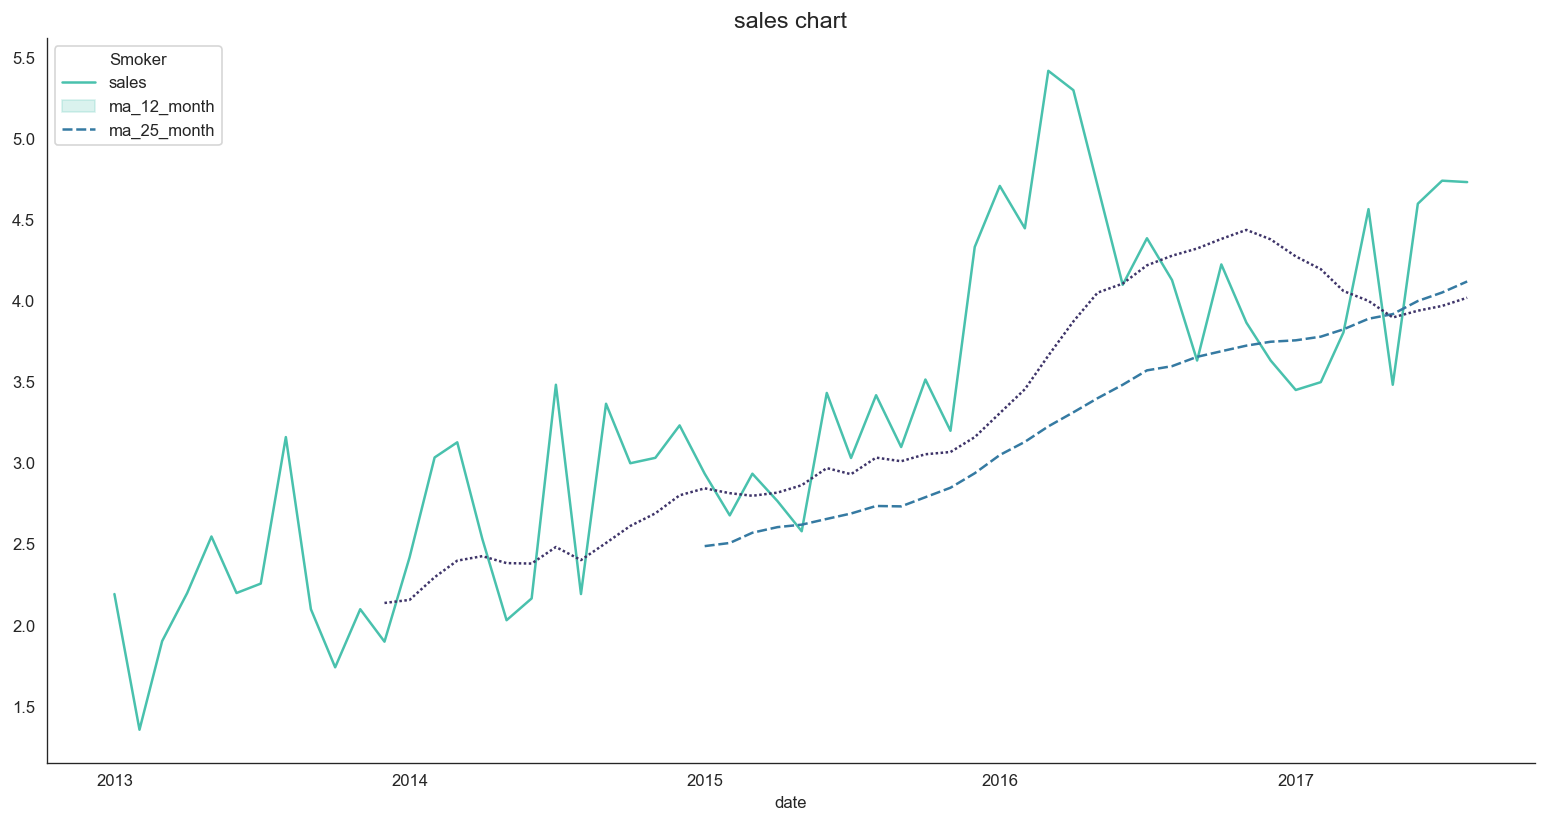

(0.2913596153071364, True)


In [58]:
def check_stationarity(df_sales, title_string, labels):
    # Visualize the data
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(title_string, fontsize=14)
    if df_sales.index.size > 12:
        df_sales['ma_12_month'] = df_sales['sales'].rolling(window=12).mean() # moving average
        df_sales['ma_25_month'] = df_sales['sales'].rolling(window=25).mean()
        sns.lineplot(data=df_sales[['sales', 'ma_25_month', 'ma_12_month']], palette=sns.color_palette("mako_r", 3))
        plt.legend(title='Smoker', loc='upper left', labels=labels)
    else:
        sns.lineplot(data=df_sales[['sales']])
    
    plt.show()
    
    sales = df_sales['sales'].dropna()
    # Perform an Ad Fuller Test
    # the default alpha = .05 stands for a 95% confidence interval
    adf_test = pm.arima.ADFTest(alpha = 0.05) 
    print(adf_test.should_diff(sales))
    
df_sales = pd.DataFrame(df2['sales'], columns=['sales'])
df_sales.index = pd.to_datetime(df2['date']) 
title = "sales chart"
labels = ['sales', 'ma_12_month', 'ma_25_month']
check_stationarity(df_sales, title, labels)

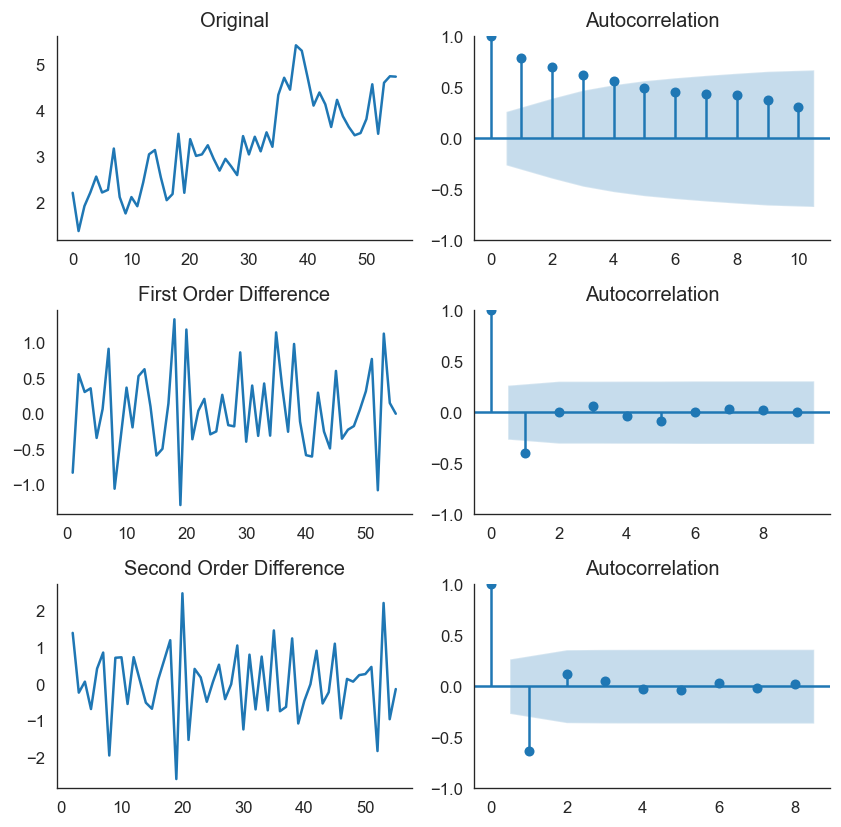

In [59]:
# Result showing time series is non-stationary, there is a upward trend
# need to define addtional parameters and construct a SARIMA model
# 3.1 Non-seasonal part
def auto_correlation(df, prefix, lags):
    plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':120})
    
    # Define the plot grid
    fig, axes = plt.subplots(3,2, sharex=False)

    # First Difference
    axes[0, 0].plot(df)
    axes[0, 0].set_title('Original' + prefix)
    plot_acf(df, lags=lags, ax=axes[0, 1])

    # First Difference
    df_first_diff = df.diff().dropna()
    axes[1, 0].plot(df_first_diff)
    axes[1, 0].set_title('First Order Difference' + prefix)
    plot_acf(df_first_diff, lags=lags - 1, ax=axes[1, 1])

    # Second Difference
    df_second_diff = df.diff().diff().dropna()
    axes[2, 0].plot(df_second_diff)
    axes[2, 0].set_title('Second Order Difference' + prefix)
    plot_acf(df_second_diff, lags=lags - 2, ax=axes[2, 1])
    plt.tight_layout()
    plt.show()
    
auto_correlation(df2['sales'], '', 10)


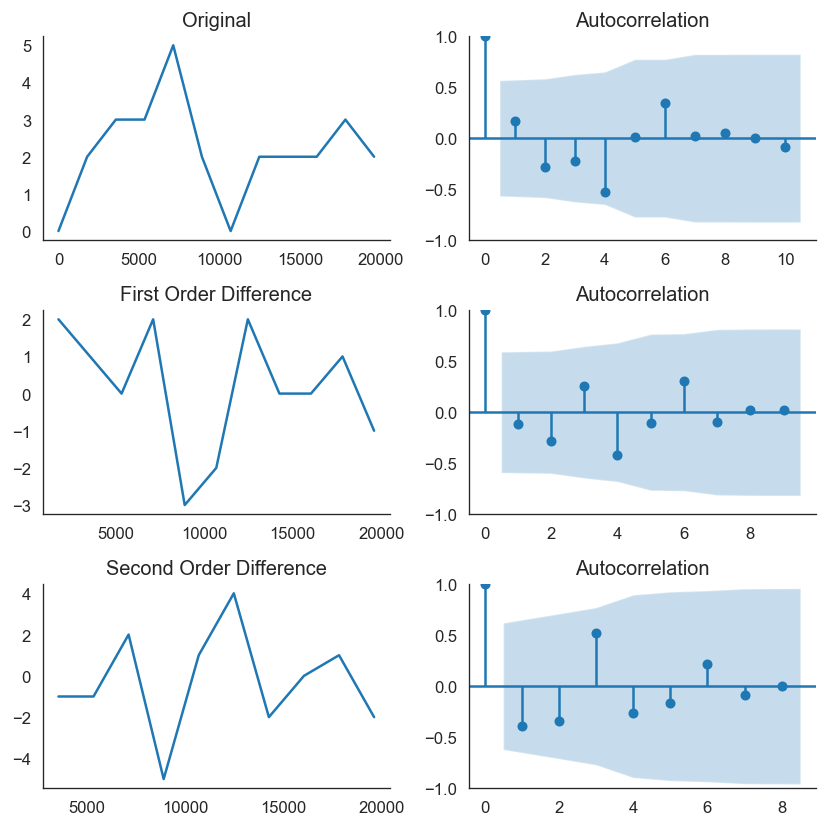

In [60]:
# The charts above show the time series becomes stationary after one order differencing
# lag goes into the negative very quickly, means overdifferencing

# Reduce the timeframe to a single seasonal period
df_sales_s = df1['sales'][0:12]

# Autocorrelation for the seasonal part
auto_correlation(df_sales_s, '', 10)

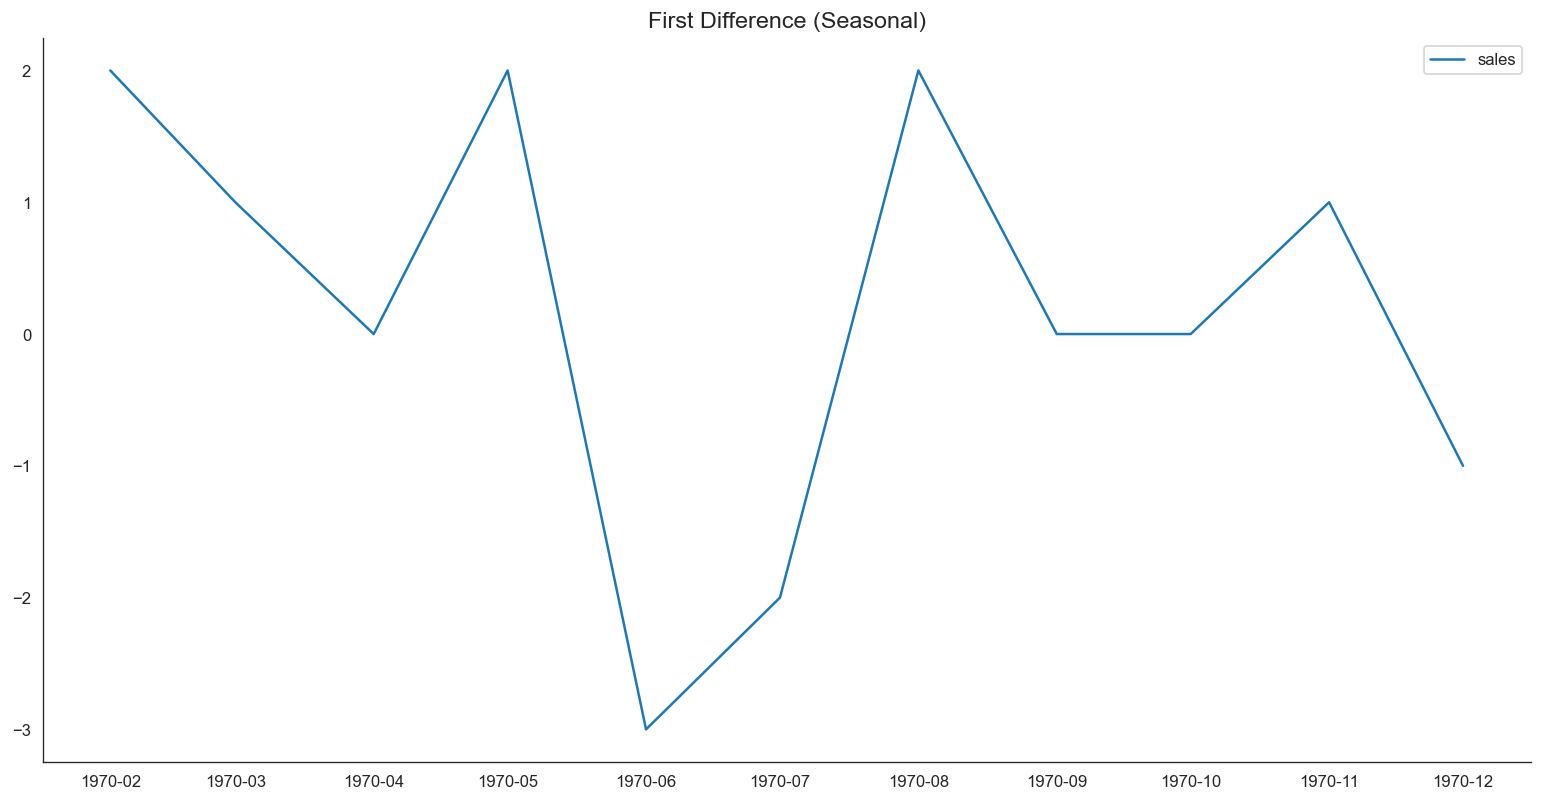

(0.8652243133738491, True)


In [61]:
# check if the first difference of seasonal period is stationary
df_diff = pd.DataFrame(df_sales_s.diff())
df_diff.index = pd.date_range(df_sales_s.diff().iloc[1], periods=12, freq='MS') 
check_stationarity(df_diff, "First Difference (Seasonal)", ['difference'])

In [72]:
# split into train and test
pred_periods = 30
split_number = df2['sales'].count() - pred_periods
df_train = pd.DataFrame(df2['sales'][:split_number]).rename(columns={'sales':'x_train'})
df_test = pd.DataFrame(df2['sales'][split_number:]).rename(columns={'sales':'x_test'})

In [73]:
# auto_arima
model_fit = pm.auto_arima(df_train, test='adf', 
                         max_p=3, max_d=3, max_q=3, 
                         seasonal=True, m=12,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=51.914, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=43.200, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=49.938, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=49.001, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=46.845, Time=0.23 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=46.301, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=44.384, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA

In [74]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   26
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                 -14.570
Date:                             Sun, 19 Mar 2023   AIC                             37.140
Time:                                     20:47:31   BIC                             42.016
Sample:                                          0   HQIC                            38.492
                                              - 26                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6944      0.155     -4.471      0.000      -0.999      -0.390
ar.S.L12      -1.7692      

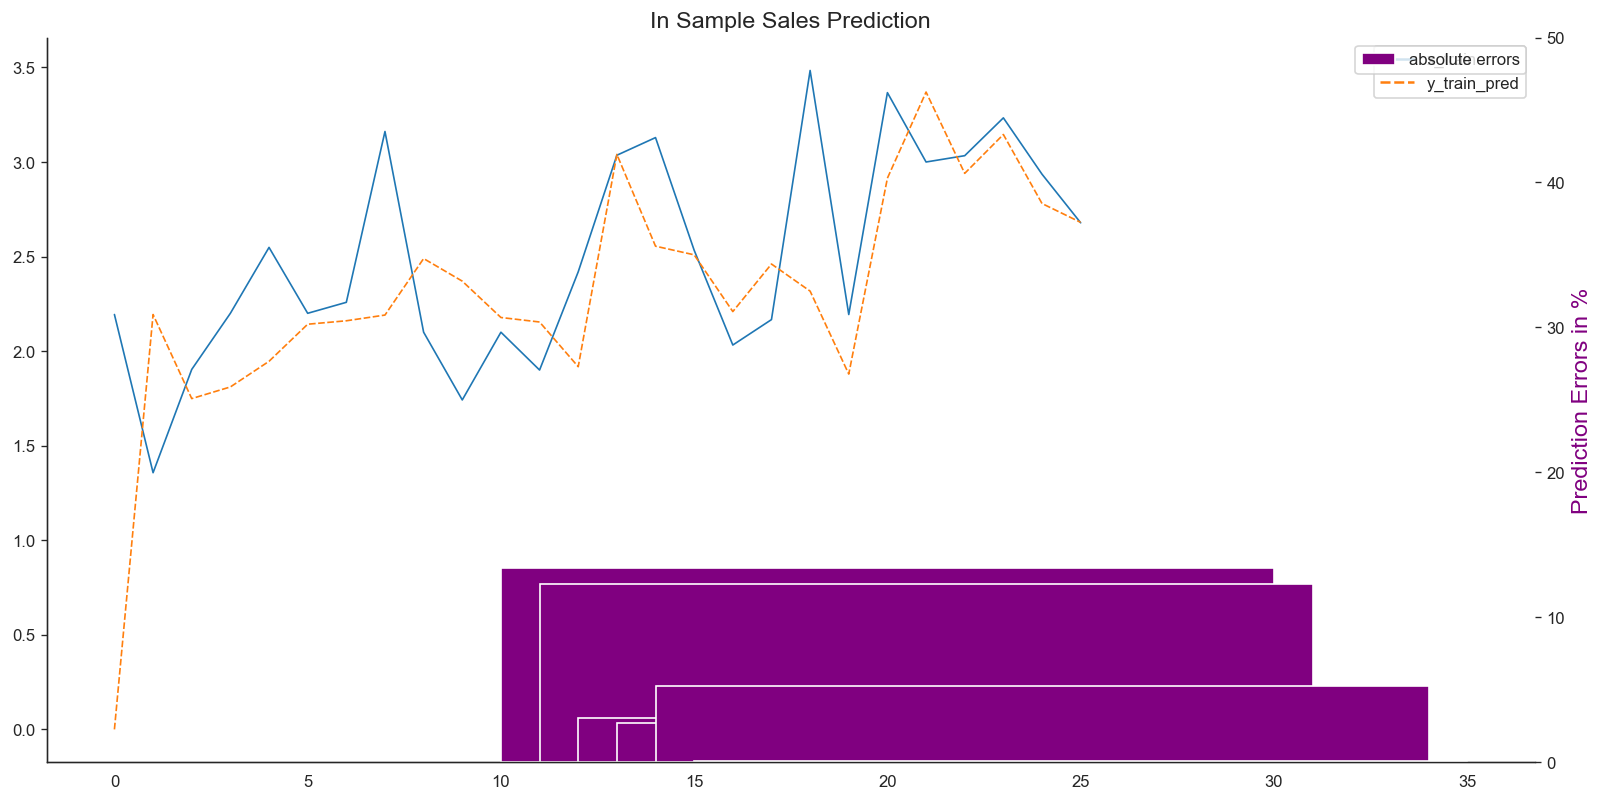

In [75]:
# Generate in-sample Predictions
# The parameter dynamic=False means that the model makes predictions upon the lagged values.
# This means that the model is trained until a point in the time-series and then tries to predict the next value.
pred = model_fit.predict_in_sample(dynamic=False) # works only with auto-arima
df_train['y_train_pred'] = pred

# Calculate the percentage difference
df_train['diff_percent'] = abs((df_train['x_train'] - pred) / df_train['x_train'])* 100

# Print the predicted time-series
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("In Sample Sales Prediction", fontsize=14)
sns.lineplot(data=df_train[['x_train', 'y_train_pred']], linewidth=1.0)

# Print percentage prediction errors on a separate axis (ax2)
ax2 = ax1.twinx() 
ax2.set_ylabel('Prediction Errors in %', color='purple', fontsize=14)  
ax2.set_ylim([0, 50])
ax2.bar(height=df_train['diff_percent'][20:], x=df_train.index[20:], width=20, color='purple', label='absolute errors')
plt.legend()
plt.show()

In [77]:
# Generate prediction for n periods, 
# Predictions start from the last date of the training data
test_pred = model_fit.predict(n_periods=pred_periods, dynamic=False)
df_test['y_test_pred'] = test_pred
df_union = pd.concat([df_train, df_test])
df_union.rename(columns={'sales':'y_test'}, inplace=True)

In [79]:
df_union.head()

,x_train,y_train_pred,diff_percent,x_test,y_test_pred
0,2.193548,0.000000,100.000000,NaN,NaN
1,1.357143,2.193548,61.629823,NaN,NaN
2,1.903226,1.749003,8.103215,NaN,NaN
3,2.200000,1.810652,17.697639,NaN,NaN
4,2.548387,1.946218,23.629415,NaN,NaN


In [ ]:
#preds, conf_int = model_fit.predict(n_periods=test.shape[0], return_conf_int=True)

In [ ]:
# make sure the time series is stationary

# divide df to pieces
# df = pd.read_csv('a.csv')
# for name in df['name'].unique():
#     locals()['df_' + name] = df[(df.name == name)]